# Day1課題
## Car Fuel Consumption
https://www.kaggle.com/anderas/car-consume

## day1やること

- 目的変数と説明変数の関係を確認するためのグラフを作成
- 目的変数を説明するのに有効そうな説明変数を見つける
- Day1で学んだアルゴリズムを利用する
       回帰問題ー＞線形回帰
       質的変数が扱えないアルゴリズムを使う場合、ダミー変数に置き換え
- 予測精度または識別精度を確認する
       回帰問題ー＞MSE、RMSE、MAE


## データ

measurements.csv <br>
各項目を日本語で説明入れてみる

| columns| 説明| 内容| 種類|
|:-----------|------------:|:------------:|:------------:|
| distance| 距離| km| 量的変数|
| consume| 消費量| L / 100km| 量的変数|
| speed| 平均速度| km/h| 量的変数|
| temp_inside| 内気温| ℃| 量的変数|
| temp_outside| 外気温|　℃| 量的変数|
| specials| スペシャル| 雨雪などの天気 <br>エアコンON/OFF| 質的変数|
| gas_type| ガソリンタイプ|　SP98、E10| 質的変数|
| AC| エアコン| 'ON':1、'OFF':0| 質的変数|
| rain| 雨| '雨':1、'雨じゃない':0| 質的変数|
| sun| 晴れ| '晴れ':1、'晴れじゃない':0| 質的変数|
| refill liters| リッター補充時の金額| ユーロ？| 量的変数|
| refill gas| ガソリン補充の種類| SP98、E10| 質的変数|

## ソースコード

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# データ読み取り
df_data  = pd.read_csv('./data/measurements.csv')

In [3]:
# 取得したデータ確認
display(df_data.head())
display(df_data.describe())

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


### データの整形

In [4]:
# 小数点表示を','から'.'に変更
df_data = df_data.replace('\,', '.', regex=True)

# 文字列から数値に変換
df_data['distance'] = df_data['distance'].astype(float)
df_data['consume'] = df_data['consume'].astype(float)
df_data['speed'] = df_data['speed'].astype(float)
df_data['temp_inside'] = df_data['temp_inside'].astype(float)
df_data['temp_outside'] = df_data['temp_outside'].astype(float)
df_data['refill liters'] = df_data['refill liters'].astype(float)

# 'SP98':0, 'E10':1に変換
df_data.loc[df_data['gas_type'] == 'SP98', 'gas_type'] = 0
df_data.loc[df_data['gas_type'] == 'E10', 'gas_type'] = 1
df_data.loc[df_data['refill gas'] == 'SP98', 'refill gas'] = 0
df_data.loc[df_data['refill gas'] == 'E10', 'refill gas'] = 1

In [5]:
# スペシャルの中身確認
df_data['specials'].value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
AC sun                 1
half rain half sun     1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [6]:
# '大文字小文字がバラバラなのでAC'と'sun'に統一
df_data.loc[df_data['specials'] == 'Sun', 'specials'] = 'sun'
df_data.loc[df_data['specials'] == 'ac', 'specials'] = 'AC'
df_data.loc[df_data['specials'] == 'AC Sun', 'specials'] = 'AC sun'
df_data.loc[df_data['specials'] == 'sun ac', 'specials'] = 'AC sun'
df_data.loc[df_data['specials'] == 'ac rain', 'specials'] = 'AC rain'
df_data['specials'].value_counts()

rain                  32
sun                   27
AC                    14
AC rain               10
AC sun                 5
snow                   3
AC snow                1
half rain half sun     1
Name: specials, dtype: int64

In [7]:
# 'specials’をダミー変数に置き換え
df_specials = pd.get_dummies(df_data['specials'])
df_specials.columns = [
    '[s]AC', '[s]AC rain', '[s]AC snow', '[s]AC sun', '[s]half rain half sun', '[s]rain', '[s]snow', '[s]sun'
]
df_data = pd.concat([df_data, df_specials],axis = 1)

# ダミー変数に置き換えたので'specials'は削除
df_data = df_data.drop(['specials'], axis = 1)

# TODO AC,rain,sunとspecialのAC,rain,sunはまとめることができないか?

In [8]:
# 欠損値確認
df_data.isnull().sum()

distance                   0
consume                    0
speed                      0
temp_inside               12
temp_outside               0
gas_type                   0
AC                         0
rain                       0
sun                        0
refill liters            375
refill gas               375
[s]AC                      0
[s]AC rain                 0
[s]AC snow                 0
[s]AC sun                  0
[s]half rain half sun      0
[s]rain                    0
[s]snow                    0
[s]sun                     0
dtype: int64

In [9]:
#  temp_insideの欠損値は、平均値を入れる
# TODO 平均値で良いのか？
df_data['temp_inside'] = df_data['temp_inside'].fillna(df_data['temp_inside'].mean())

# 'refill liters','refil gas'は欠損値多すぎるので削除
# TODO 消さずに使う方法は無いか？
df_data = df_data.drop('refill liters', axis=1)
df_data = df_data.drop('refill gas', axis=1)

### グラフを可視化

distance                -0.128967
consume                  1.000000
speed                   -0.227866
temp_inside             -0.160623
temp_outside            -0.320811
gas_type                 0.015327
AC                       0.096591
rain                     0.248118
sun                     -0.170667
[s]AC                   -0.042500
[s]AC rain               0.084747
[s]AC snow               0.107772
[s]AC sun               -0.036804
[s]half rain half sun   -0.010462
[s]rain                  0.157122
[s]snow                  0.021755
[s]sun                  -0.168194
Name: consume, dtype: float64

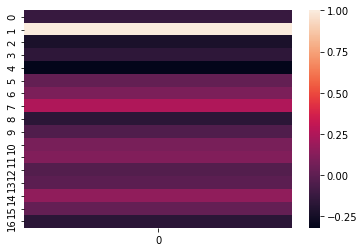

In [10]:
# 'consume'に絞って、相関係数、ヒートマップを可視化
# TODO 行名、列名はどうやって表示すればいい？
consume_corr = df_data.corr()['consume']
display(consume_corr)
sns.heatmap(consume_corr[:, np.newaxis])

In [11]:
# 散布図行列は表示項目が多すぎて見づらいため省略
# pd.plotting.scatter_matrix(df_data, figsize=(10,10))
# plt.show()

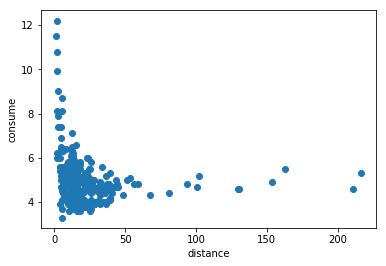

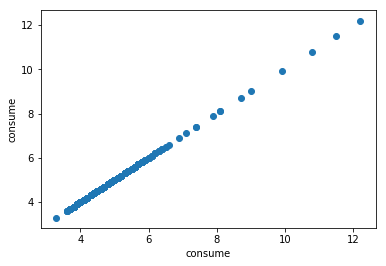

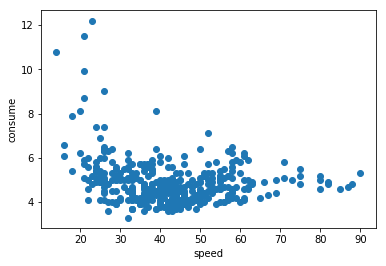

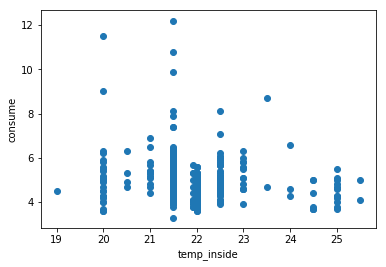

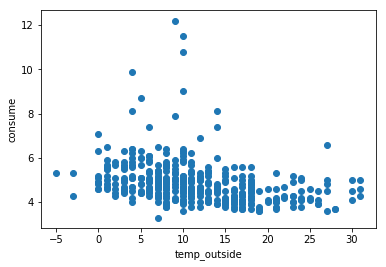

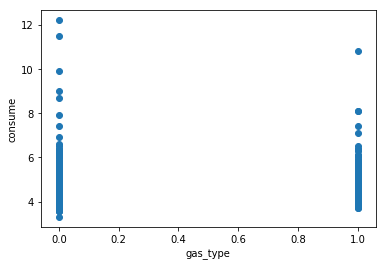

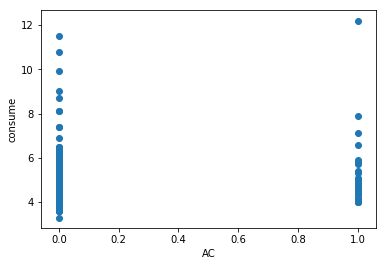

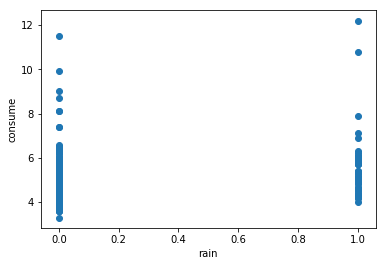

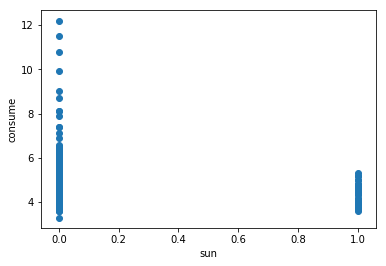

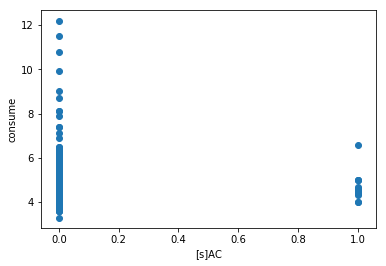

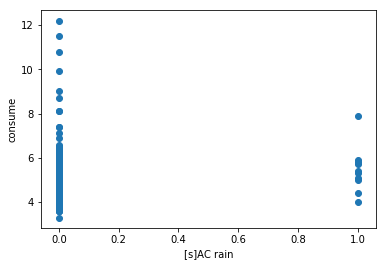

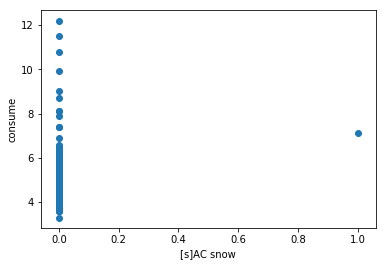

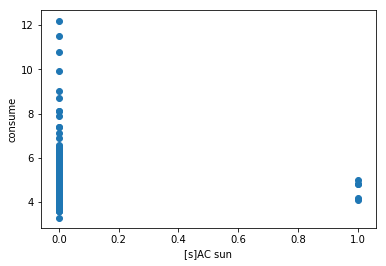

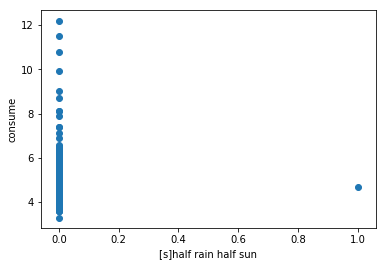

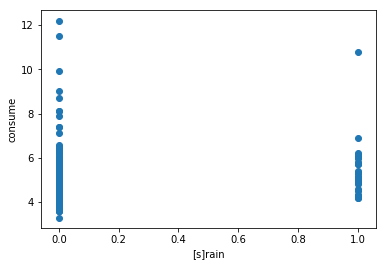

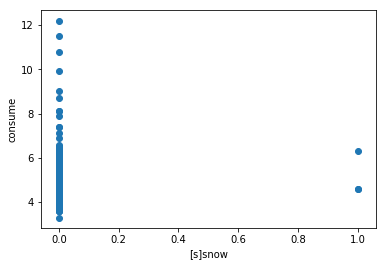

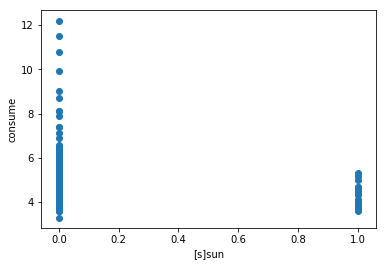

In [12]:
# consumeに絞って散布図表示してみる
for column in df_data.columns:
    plt.scatter(df_data[column], df_data['consume'])
    plt.xlabel(column)
    plt.ylabel('consume')
    plt.show()

### 検証

In [13]:
# どのデータを説明変数にすれば良いか分からないので、
# 相関係数の値を変えながら、
# それを満たす説明変数を選択した際の制度を抽出
for exp_num in np.arange(0, 1, 0.1):
    exp_data = df_data.corr()['consume'][
        abs(consume_corr) >= exp_num
    ].index
    exp_data = exp_data.drop('consume')

    print('-----------------------------------')
    print('相関係数の絶対値が{}以上の説明変数'.format(exp_num))
    print(exp_data)

    if not len(exp_data):
        print('該当する説明変数無し->終了！')
        break
    
    X = df_data[exp_data].values
    y = df_data['consume'].values

    # 線形回帰
    regr = LinearRegression(fit_intercept = True)
    regr.fit(X, y)

    y_pred = regr.predict(X)
    mse = mean_squared_error(y, y_pred) 
    mae = mean_absolute_error(y, y_pred) 
    rmse = np.sqrt(mse)
    
    print("MSE = %s"%round(mse,3))  
    print("MAE = %s"%round(mae,3))
    print("RMSE = %s\n"%round(rmse, 3))
    
    # 重みと二乗誤差の確認
    y_est = regr.intercept_
    print('w0 = {:.3f}'.format(y_est))

    w, x = [], []
    for cnt, column in enumerate(exp_data):
        w.append(regr.coef_[cnt])
        x.append(df_data[column].values)
        y_est += w[cnt] * x[cnt]
        print('w{} : {} = {:.3f}'.format(cnt + 1, exp_data[cnt], w[cnt]))

    squared_error = 0.5 * np.sum((y - y_est) ** 2)
    print('二乗誤差 = {:.3f}\n'.format(squared_error))

-----------------------------------
相関係数の絶対値が0.0以上の説明変数
Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'AC',
       'rain', 'sun', '[s]AC', '[s]AC rain', '[s]AC snow', '[s]AC sun',
       '[s]half rain half sun', '[s]rain', '[s]snow', '[s]sun'],
      dtype='object')
MSE = 0.737
MAE = 0.585
RMSE = 0.858

w0 = 7.275
w1 : distance = 0.002
w2 : speed = -0.017
w3 : temp_inside = -0.060
w4 : temp_outside = -0.039
w5 : gas_type = 0.024
w6 : AC = -0.136
w7 : rain = 7.096
w8 : sun = 0.148
w9 : [s]AC = 0.333
w10 : [s]AC rain = -6.505
w11 : [s]AC snow = -4.933
w12 : [s]AC sun = 0.496
w13 : [s]half rain half sun = -7.317
w14 : [s]rain = -6.574
w15 : [s]snow = -7.068
w16 : [s]sun = -0.348
二乗誤差 = 142.947

-----------------------------------
相関係数の絶対値が0.1以上の説明変数
Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'rain', 'sun',
       '[s]AC snow', '[s]rain', '[s]sun'],
      dtype='object')
MSE = 0.846
MAE = 0.614
RMSE = 0.92

w0 = 7.448
w1 : distance = 0.002
w2 : spee

## まとめ
検証より、説明変数に全部のデータを使ったほうが誤差が小さくなった。 <br>
そもそもデータの整形段階で、相関係数が高くなるデータを作る必要がありそう。（TODO項目の箇所） <br>
